<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Kaggle Competitions: House Prices - Advanced Regression Techniques  @FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 01 - Data exploration 📌
</div>

# Import the library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')

# Explore data

## Load the dataset

In [2]:
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')

In [3]:
df_train = df_train.drop('Id', axis=1)
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### How many rows and how many columns does the raw data have?

In [4]:
df_train.shape

(1460, 80)

### What does each line mean?

Information of each house sold

### Does the raw data have duplicate rows?

In [5]:
num_duplicated_rows = df_train.duplicated().sum()

In [6]:
if num_duplicated_rows == 0:
    print(f"Data have no duplicated line.!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Data have {num_duplicated_rows} duplicated " + ext + ". Please de-deduplicate your raw data.!")

Data have no duplicated line.!


### What does each column mean? 

- SalePrice -the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### What data type does each column currently have?

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### For each column with numeric data type, how are the values distributed?
- Percentage (from 0 to 100) of missing values
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

In [8]:
def missing_ratio(x):
    missing_ratio = x.isnull().sum()/len(x)
    return missing_ratio.round(1)

def lower_quartile(x):
    return x.quantile(0.25).round(1)

def median(x):
    return x.median().round(1)

def upper_quartile(x):
    return x.quantile(0.75).round(1)

# Tạo DataFrame trống
num_col_info_df = pd.DataFrame(df_train.select_dtypes(include=[np.number]))
num_col_info_df = num_col_info_df.agg([ missing_ratio,"min",lower_quartile, median,upper_quartile,"max"])

In [9]:
num_col_info_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
missing_ratio,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
lower_quartile,20.0,59.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
median,50.0,69.0,9478.5,6.0,5.0,1973.0,1994.0,0.0,383.5,0.0,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
upper_quartile,70.0,80.0,11601.5,7.0,6.0,2000.0,2004.0,166.0,712.2,0.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,5644.0,1474.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


### Drop numerical columns with so many missing value

In [10]:
def drop_missing_features_numerical(df: pd.DataFrame, missing_lst: dict = dict(num_col_info_df.iloc[0]), threshold: float = 50.0) -> pd.DataFrame:
    for col, missing_rate in missing_lst.items():
        if missing_rate > threshold:
            del df[col]
    return df
df_train = drop_missing_features_numerical(df_train)

### Fill missing numerical value by mean

In [11]:
def filling_missing_value_numerical(df: pd.DataFrame) -> pd.DataFrame:
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numerical_columns:
        mean = df[col].mean() 
        df[col].fillna(value=mean, inplace=True) 
    
    return df
df_train = filling_missing_value_numerical(df_train)

### For each column with a non-numeric data type, how are the values distributed?
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types. (Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà có kiểu là categorical, nó là một tập hợp có số lượng hữu hạn các loại. Việc đếm trực tiếp số lượng các giá trị trong những cột này không có nhiều ý nghĩa, nên tốt hơn hết là mà sẽ đếm số lượng phần tử các loại.)
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

In [12]:
cat_col_info_df = df_train.select_dtypes(include='object')
def missing_ratio(x):
    missing_ratio = x.isnull().sum()/len(x)
    return missing_ratio
    
def num_values(x):
    result = x.value_counts().to_dict()
    return result


def value_ratios(x):

    result = {}
    counterDict = num_values(x)
    total = sum(counterDict.values())
    for key,val in counterDict.items():
        result[key] = val / total
    return result

# raise NotImplementedError()


cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
missing_ratio,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.055479,0.055479,0.055479,0.055479,0.0,0.995205,0.807534,0.963014,0.0,0.0
num_values,"{'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C...","{'Pave': 1454, 'Grvl': 6}","{'Grvl': 50, 'Pave': 41}","{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}","{'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}","{'AllPub': 1459, 'NoSeWa': 1}","{'Inside': 1052, 'Corner': 263, 'CulDSac': 94,...","{'Gtl': 1382, 'Mod': 65, 'Sev': 13}","{'NAmes': 225, 'CollgCr': 150, 'OldTown': 113,...","{'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRA...",...,"{'Attchd': 870, 'Detchd': 387, 'BuiltIn': 88, ...","{'Unf': 605, 'RFn': 422, 'Fin': 352}","{'TA': 1311, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po'...","{'TA': 1326, 'Fa': 35, 'Gd': 9, 'Po': 7, 'Ex': 2}","{'Y': 1340, 'N': 90, 'P': 30}","{'Gd': 3, 'Ex': 2, 'Fa': 2}","{'MnPrv': 157, 'GdPrv': 59, 'GdWo': 54, 'MnWw'...","{'Shed': 49, 'Gar2': 2, 'Othr': 2, 'TenC': 1}","{'WD': 1267, 'New': 122, 'COD': 43, 'ConLD': 9...","{'Normal': 1198, 'Partial': 125, 'Abnorml': 10..."
value_ratios,"{'RL': 0.7883561643835616, 'RM': 0.14931506849...","{'Pave': 0.9958904109589041, 'Grvl': 0.0041095...","{'Grvl': 0.5494505494505495, 'Pave': 0.4505494...","{'Reg': 0.6335616438356164, 'IR1': 0.331506849...","{'Lvl': 0.897945205479452, 'Bnk': 0.0431506849...","{'AllPub': 0.9993150684931507, 'NoSeWa': 0.000...","{'Inside': 0.7205479452054795, 'Corner': 0.180...","{'Gtl': 0.9465753424657535, 'Mod': 0.044520547...","{'NAmes': 0.1541095890410959, 'CollgCr': 0.102...","{'Norm': 0.863013698630137, 'Feedr': 0.0554794...",...,"{'Attchd': 0.630891950688905, 'Detchd': 0.2806...","{'Unf': 0.43872371283538797, 'RFn': 0.30601885...","{'TA': 0.9506889050036258, 'Fa': 0.03480783176...","{'TA': 0.9615663524292966, 'Fa': 0.02538071065...","{'Y': 0.9178082191780822, 'N': 0.0616438356164...","{'Gd': 0.42857142857142855, 'Ex': 0.2857142857...","{'MnPrv': 0.5587188612099644, 'GdPrv': 0.20996...","{'Shed': 0.9074074074074074, 'Gar2': 0.0370370...","{'WD': 0.8678082191780822, 'New': 0.0835616438...","{'Normal': 0.8205479452054795, 'Partial': 0.08..."


### Drop categorical columns with so many missing value (> 50%)

In [13]:
def drop_missing_features_categorical(df: pd.DataFrame, missing_lst:dict = dict(cat_col_info_df.iloc[0]), threshold: float = 50.0) -> pd.DataFrame:
    for col, missing_ratio in missing_lst.items():
        if col in df.select_dtypes(include=['object']):
            
            if missing_ratio * 100 > threshold:
                del df[col]
    return df
df_train = drop_missing_features_categorical(df_train)

### Fill missing categorical value by mode

In [14]:
def filling_missing_value_categorical(df: pd.DataFrame) -> pd.DataFrame:
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_columns:
        mode_val = df[col].mode()[0]  # Lấy mode của cột
        df[col].fillna(value=mode_val, inplace=True) 
    
    return df
df_train = filling_missing_value_categorical(df_train)

# Save data

In [15]:
print(f"Total number of features: {df_train.shape[1]}")
df_train.dtypes

Total number of features: 75


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 75, dtype: object

In [16]:
df_train.to_csv('../data/processed/train_processed.csv', index=False)

If the missing value is more than 50%, it is better to remove value, but the 'NaN' value has meaning, so use it.

In [18]:
missing_value_1 = pd.DataFrame(df_train.isna().mean(), columns=['Percentage'])
missing_value_1 = missing_value_1[missing_value_1['Percentage'] >= 0.5]
missing_value_1

,Percentage


In [19]:
idx = missing_value_1.index
for i in idx:
    print(i,"\'s kinds :",df_train[i].unique())

Clears rows with a missing value of 0.5% or less.

In [20]:
missing_value_2 = pd.DataFrame(df_train.isna().mean(), columns=['Percentage'])
missing_value_2 = missing_value_2[(missing_value_2['Percentage'] > 0) & (missing_value_2['Percentage'] <= 0.5)]
missing_value_2

,Percentage


In [21]:
idx = missing_value_2.index
for i in idx:
    print(i,"\'s kinds :",df_train[i].unique())

As a result of analyzing the missing values of the data, it would be better to remove the numerical type row.

In [22]:
num_columns = df_train.select_dtypes(include=['number']).columns
df_train= df_train.dropna(subset=num_columns)

Create two groups: numerical features and categorical features

In [23]:
num_features = df_train.select_dtypes(include=np.number).columns
cat_features = df_train.select_dtypes(include=object).columns

In [24]:
def count_outliers(feature):
    data = df_train[feature]
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    lower_cutoff = Q1 - 1.5 * IQR
    upper_cutoff = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = [value for value in data if value < lower_cutoff or value > upper_cutoff]
    
    return len(outliers)

In [25]:
for feature in num_features:
    outliers = count_outliers(feature)
    if outliers:
        print(f'{feature} outliers detected: {outliers}')

MSSubClass outliers detected: 103
LotFrontage outliers detected: 106
LotArea outliers detected: 69
OverallQual outliers detected: 2
OverallCond outliers detected: 125
YearBuilt outliers detected: 7
MasVnrArea outliers detected: 98
BsmtFinSF1 outliers detected: 7
BsmtFinSF2 outliers detected: 167
BsmtUnfSF outliers detected: 29
TotalBsmtSF outliers detected: 61
1stFlrSF outliers detected: 20
2ndFlrSF outliers detected: 2
LowQualFinSF outliers detected: 26
GrLivArea outliers detected: 31
BsmtFullBath outliers detected: 1
BsmtHalfBath outliers detected: 82
BedroomAbvGr outliers detected: 35
KitchenAbvGr outliers detected: 68
TotRmsAbvGrd outliers detected: 30
Fireplaces outliers detected: 5
GarageYrBlt outliers detected: 1
GarageCars outliers detected: 5
GarageArea outliers detected: 21
WoodDeckSF outliers detected: 32
OpenPorchSF outliers detected: 77
EnclosedPorch outliers detected: 208
3SsnPorch outliers detected: 24
ScreenPorch outliers detected: 116
PoolArea outliers detected: 7
Misc

In [26]:
df_train.duplicated().sum()

0

#### Visualize data

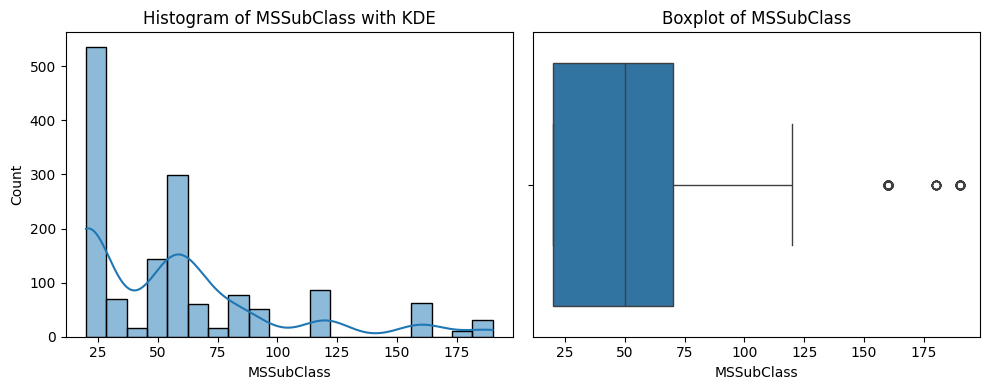

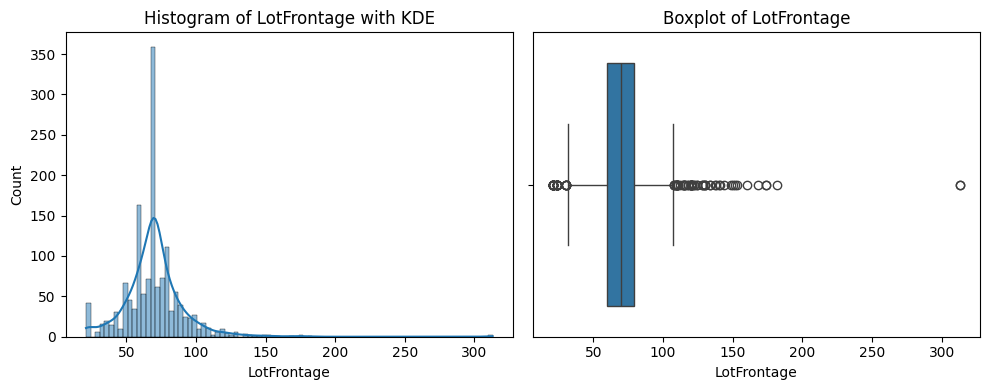

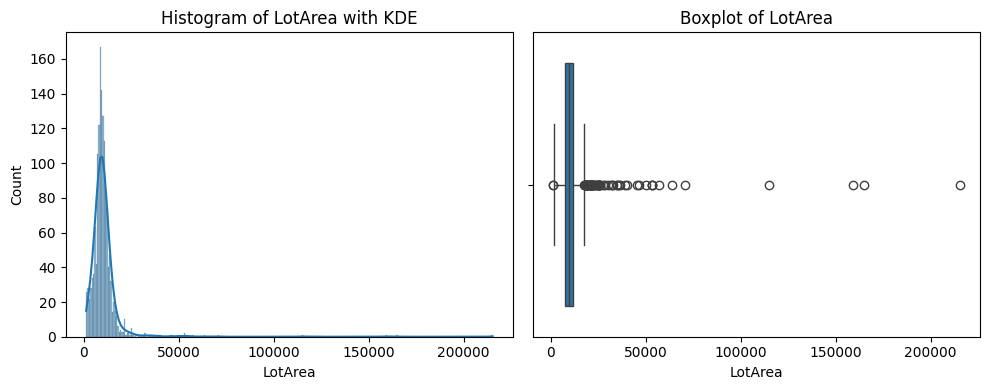

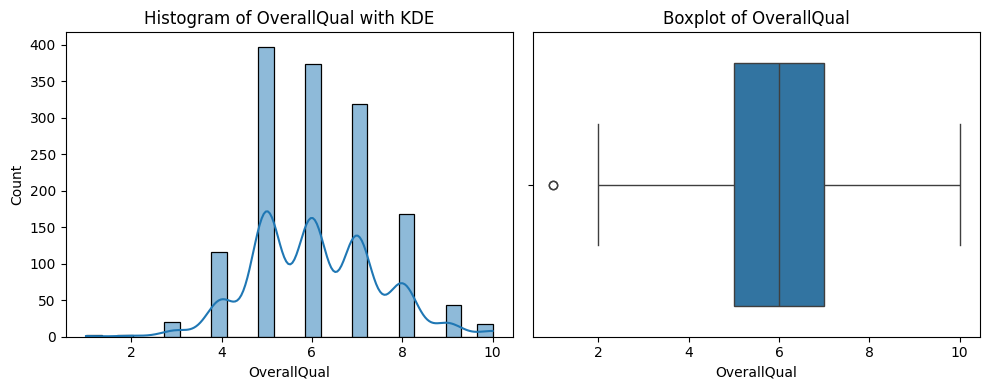

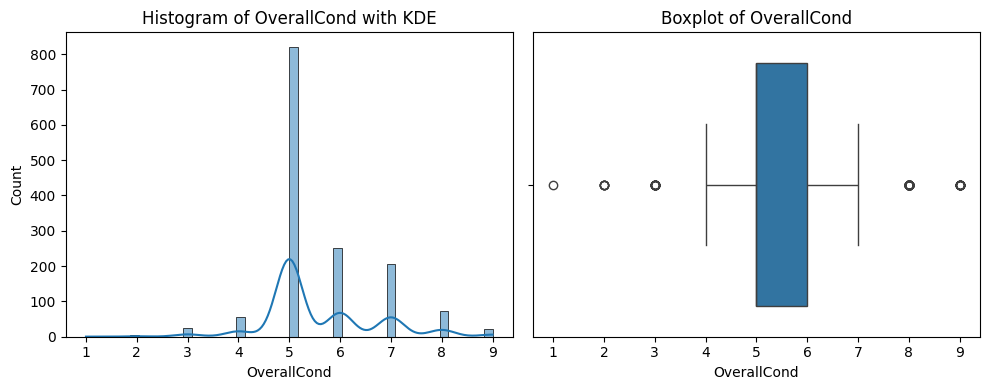

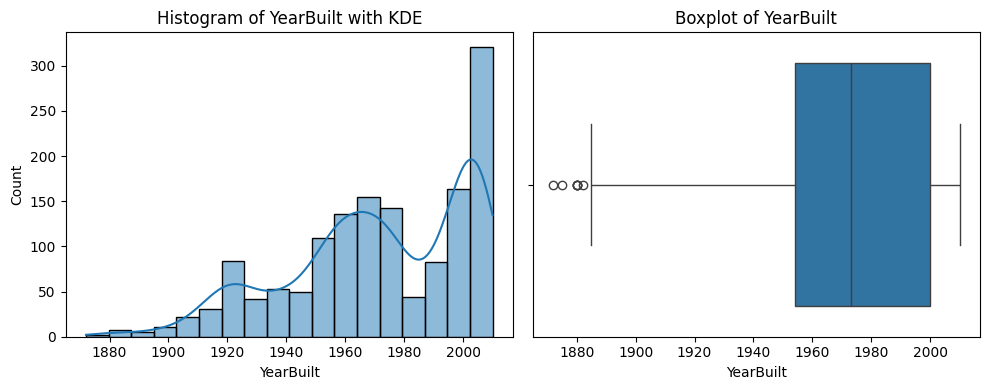

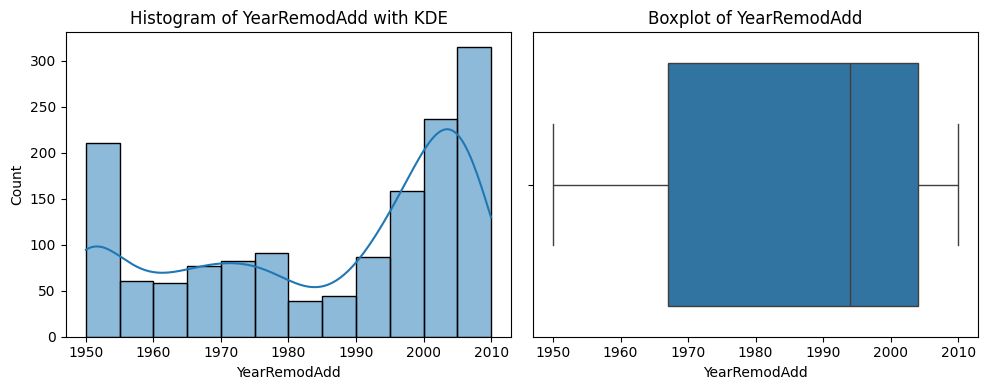

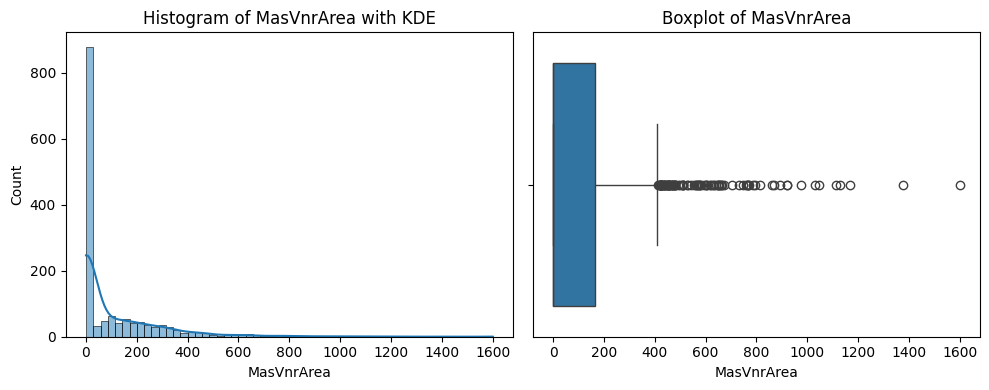

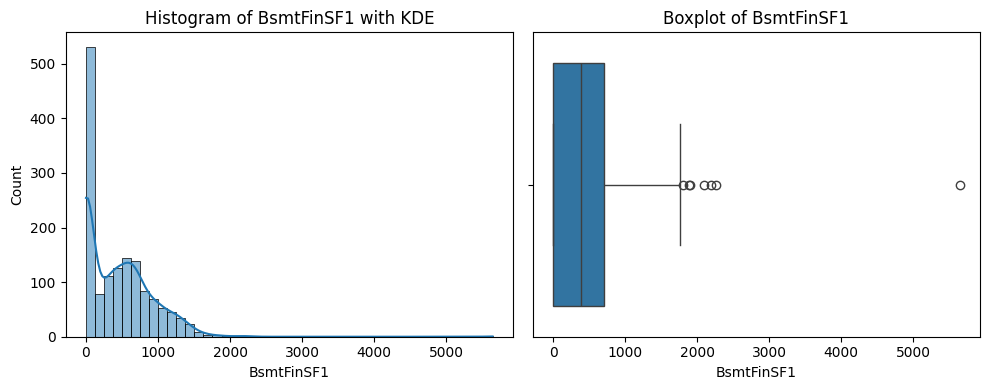

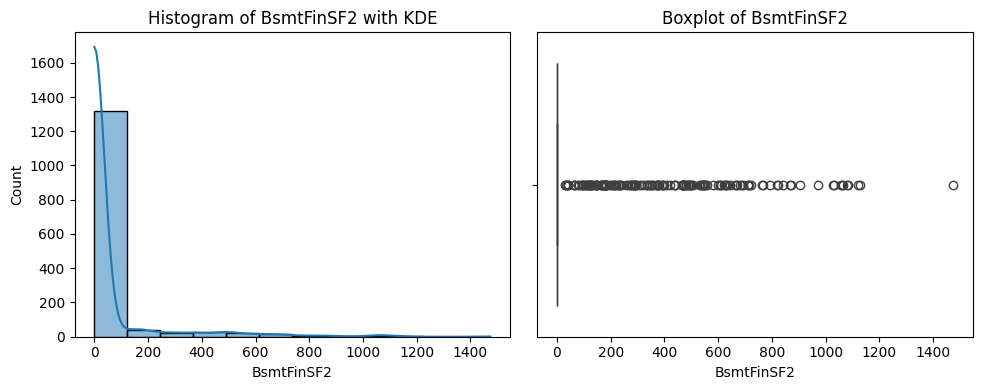

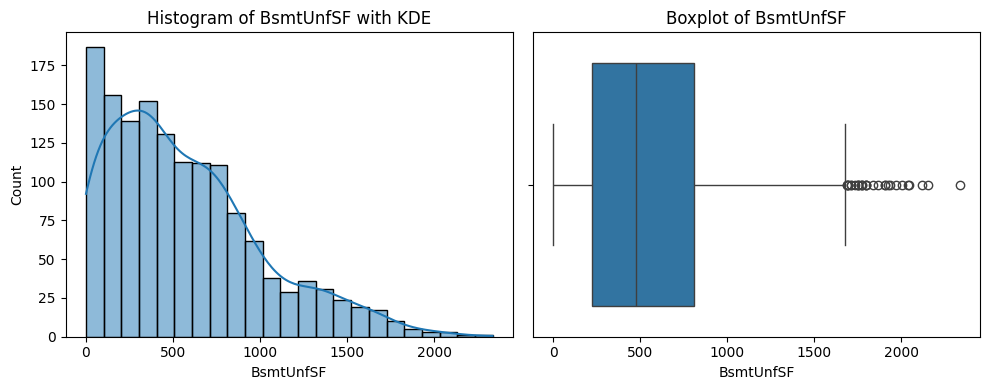

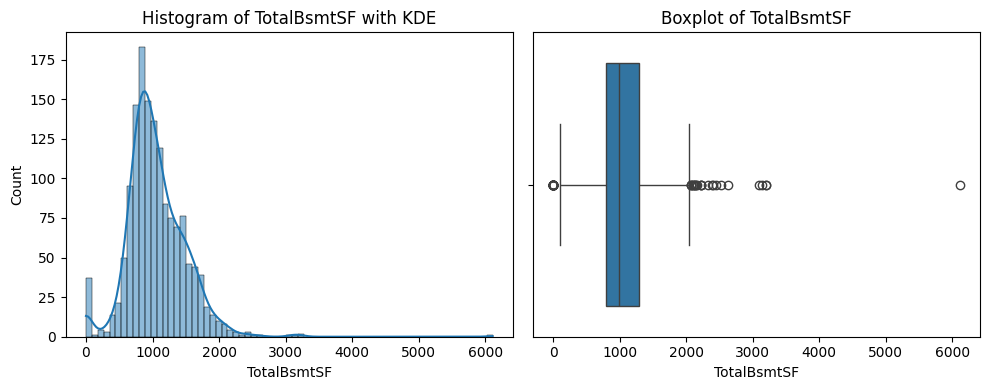

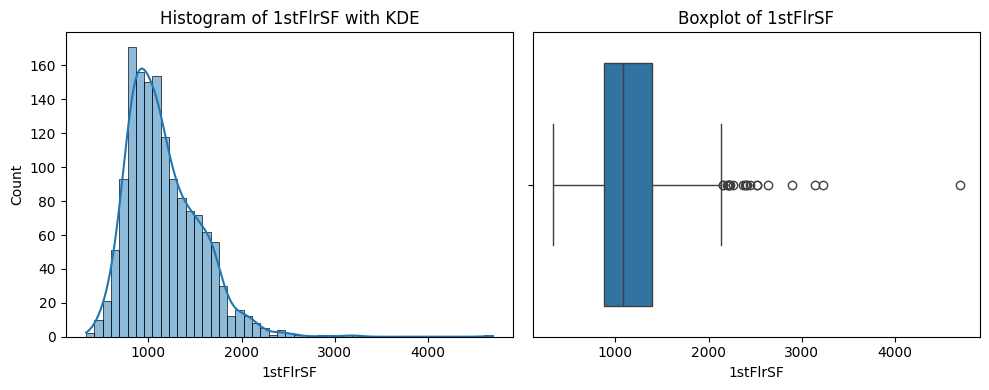

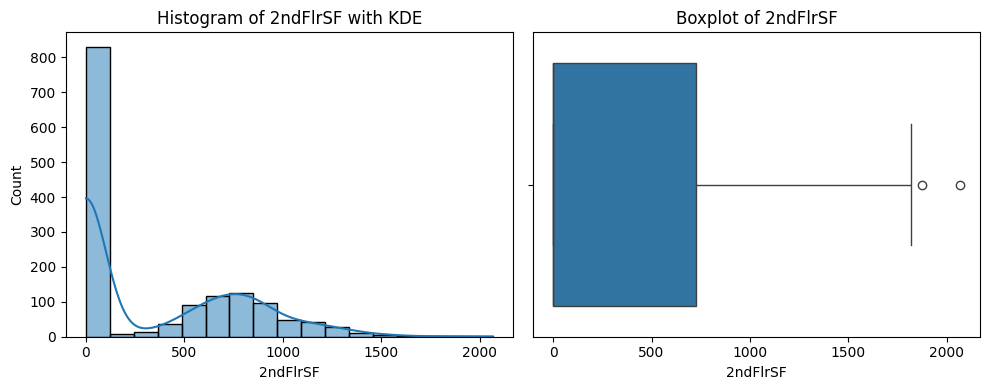

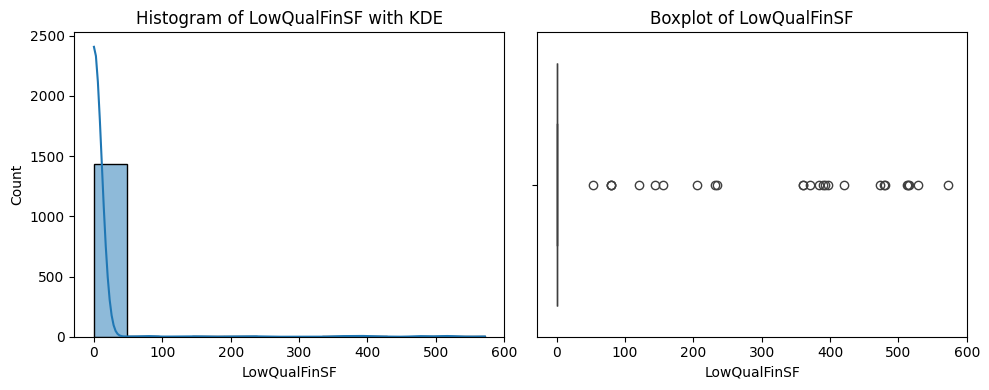

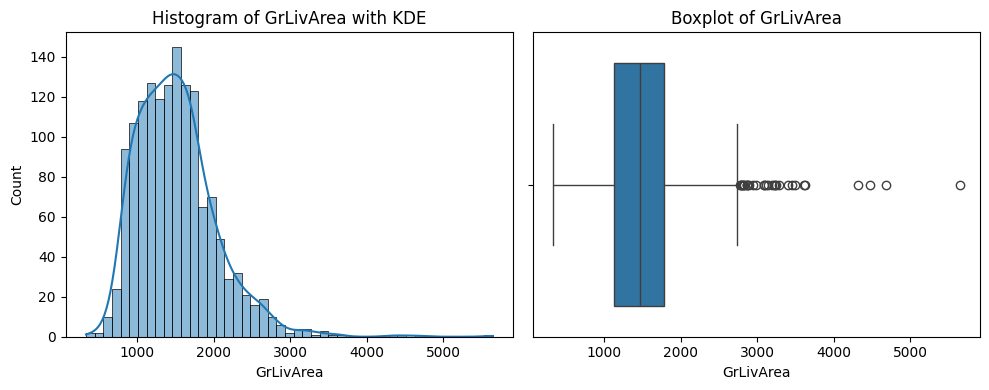

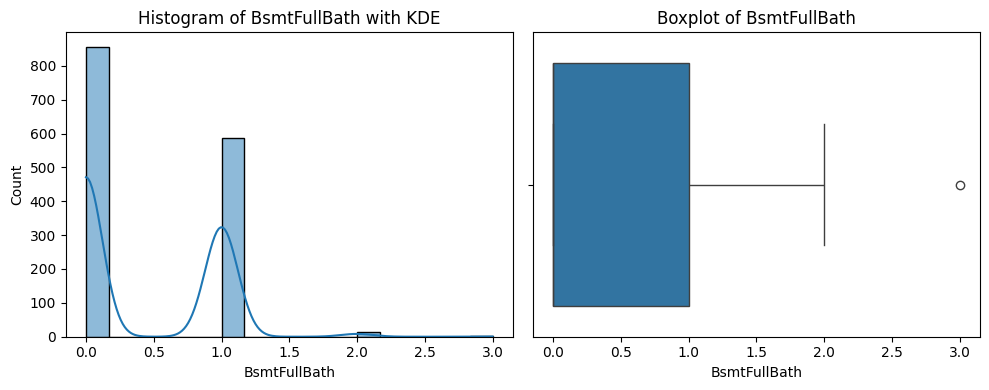

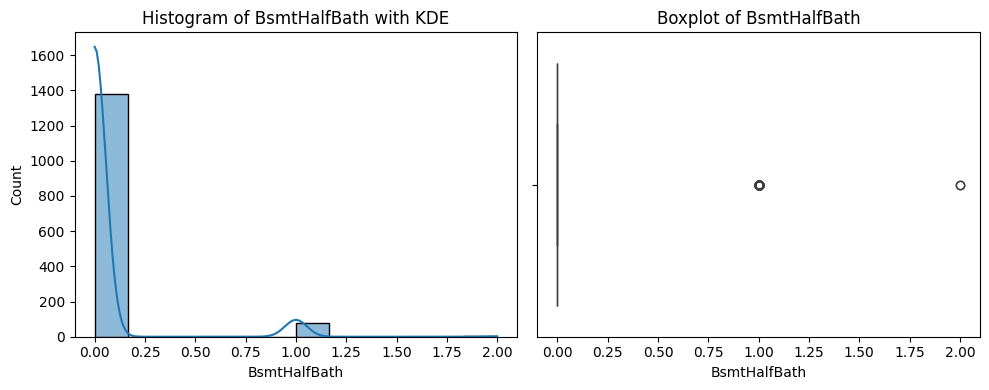

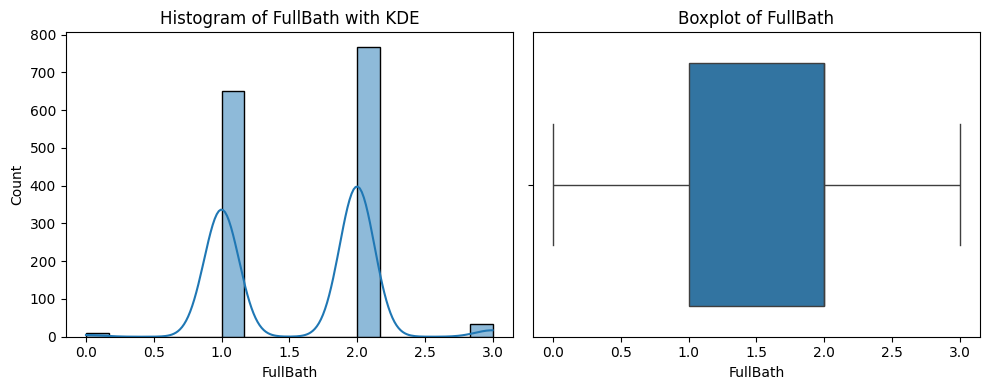

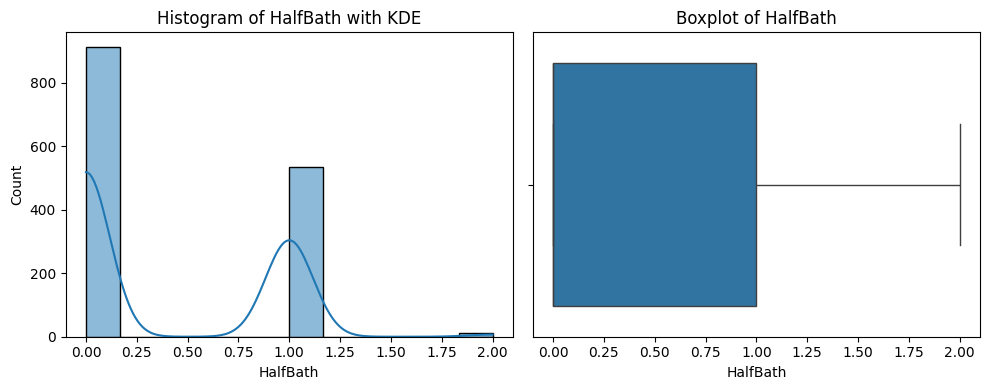

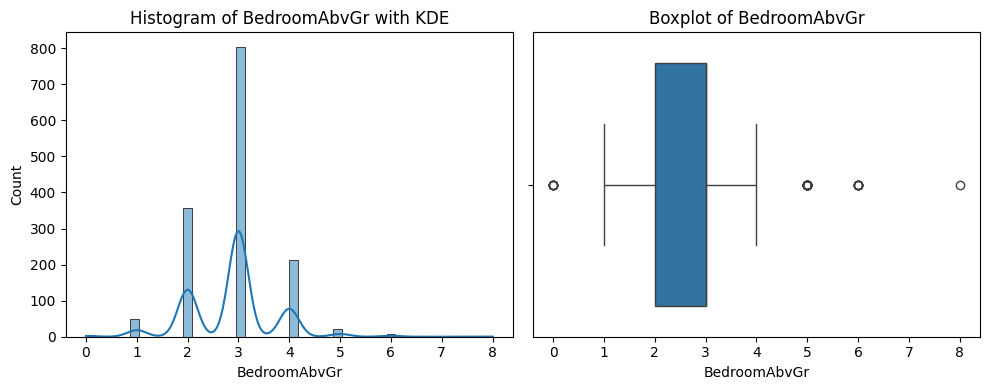

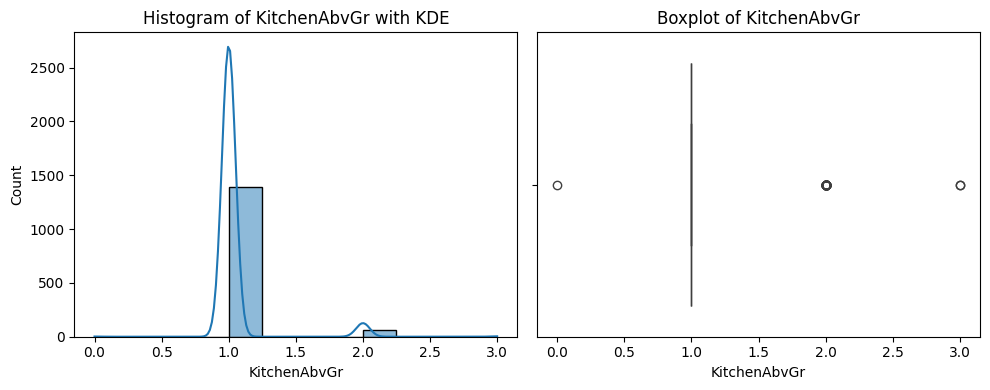

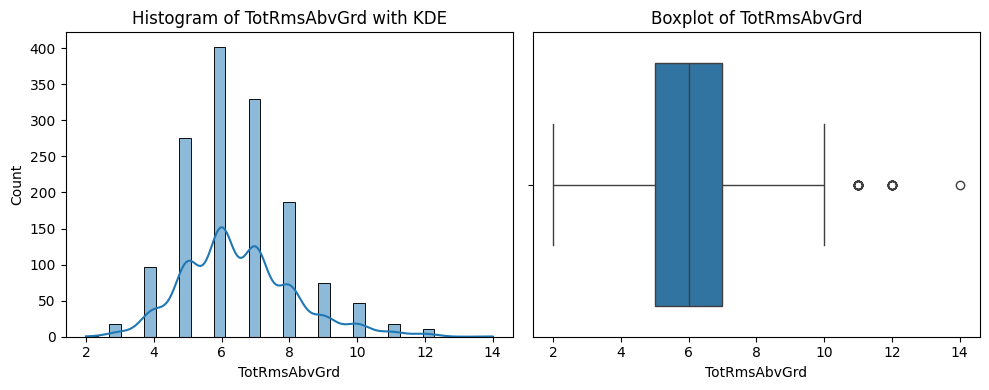

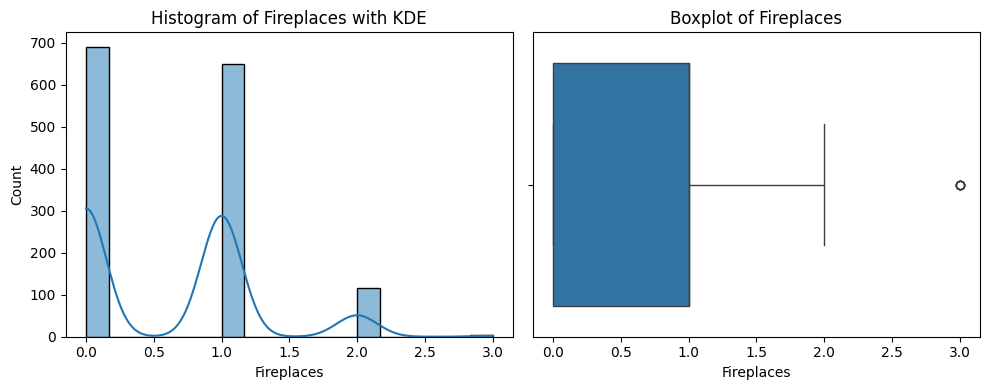

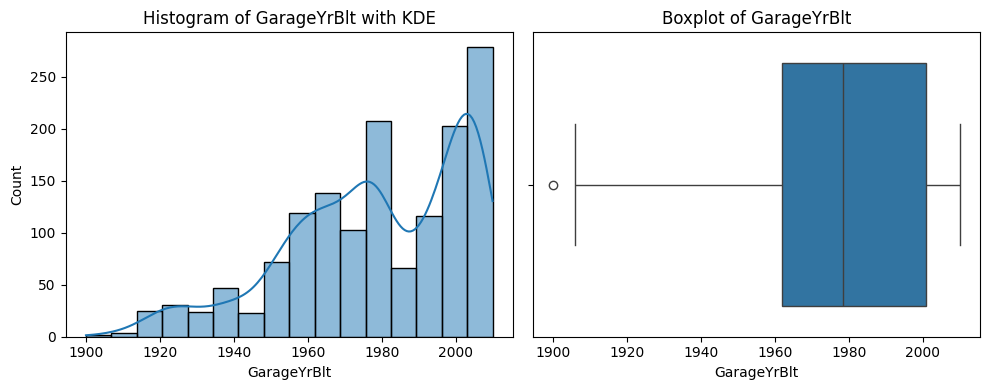

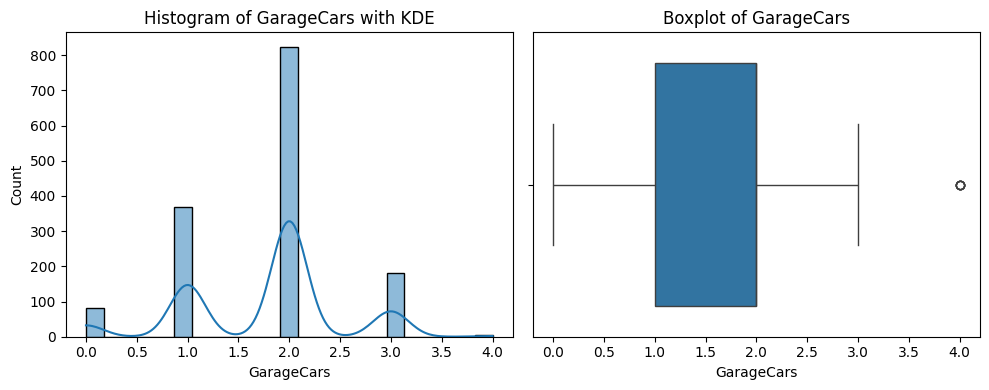

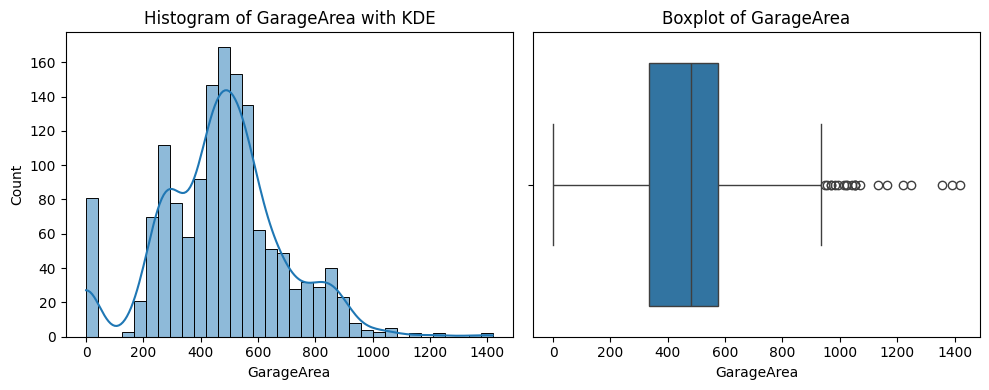

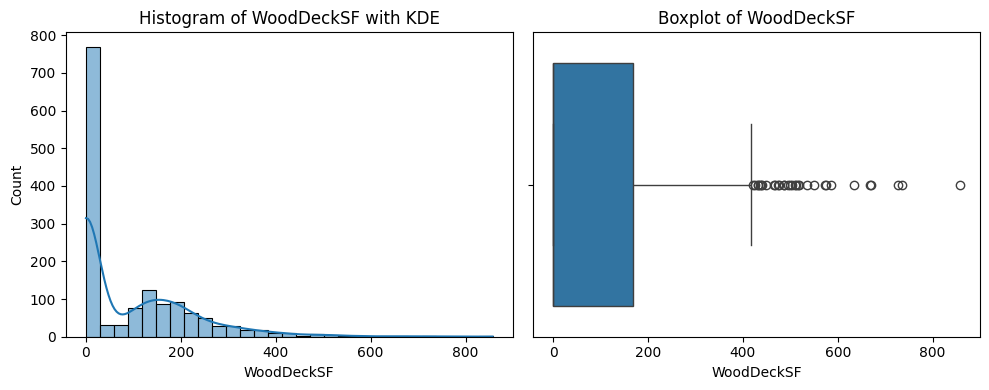

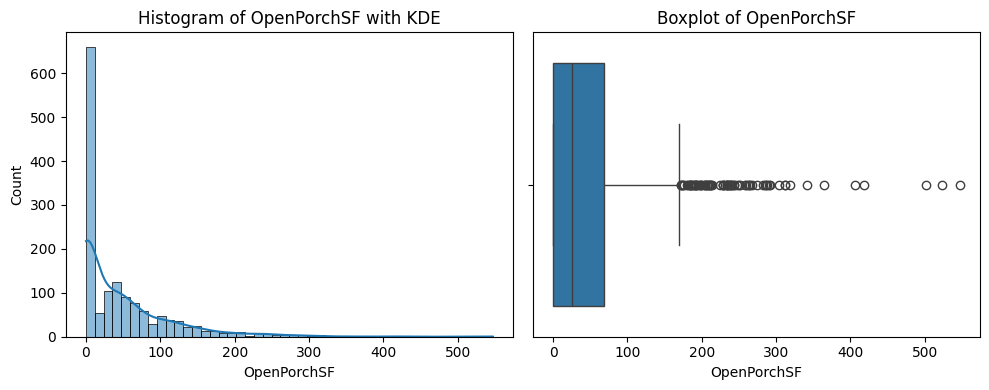

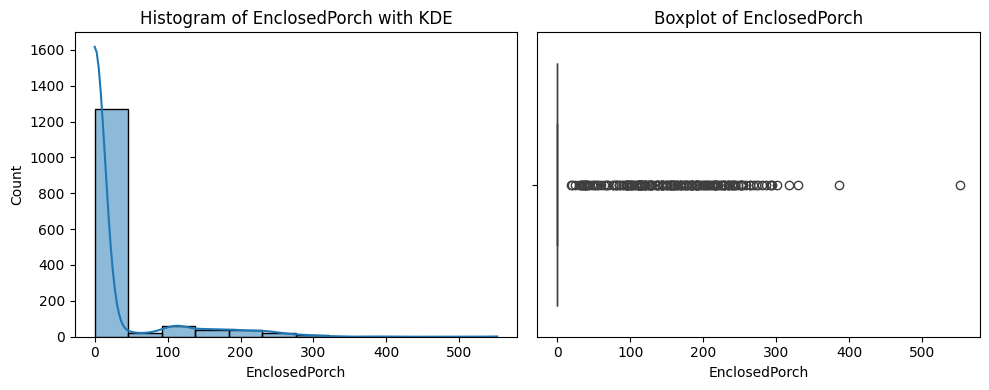

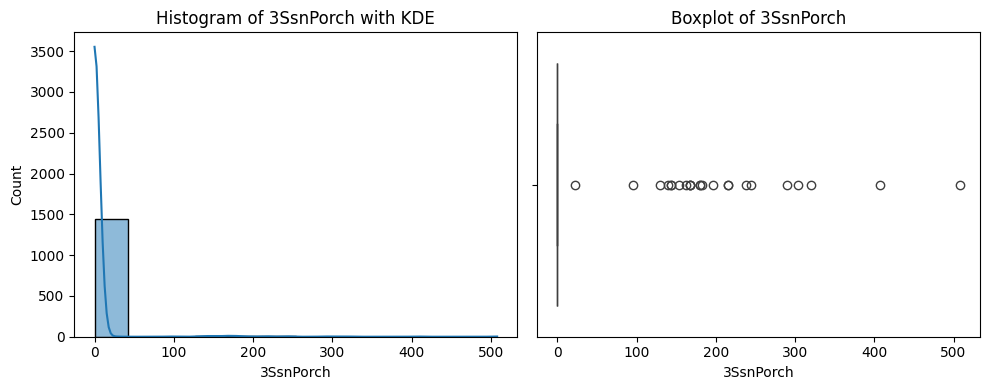

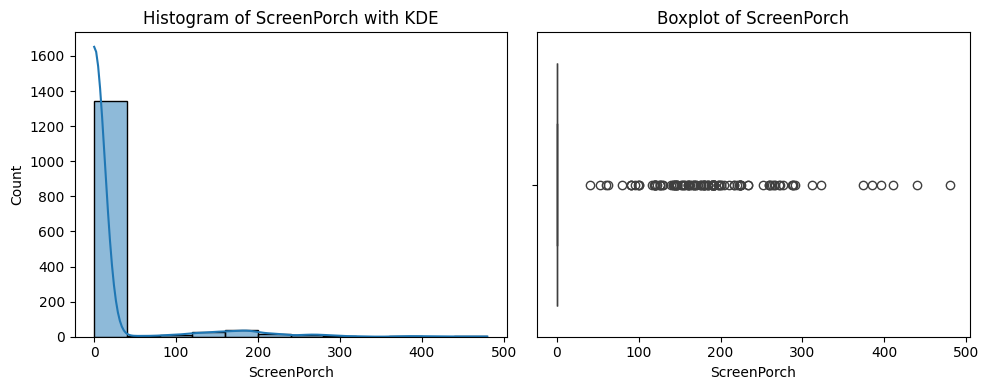

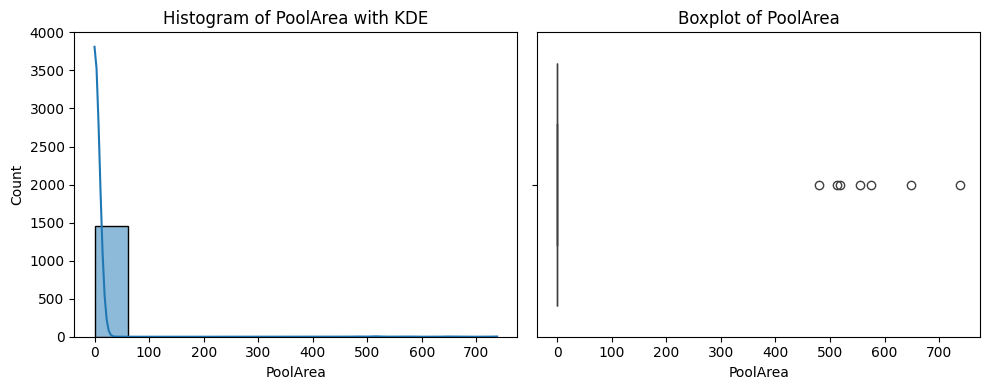

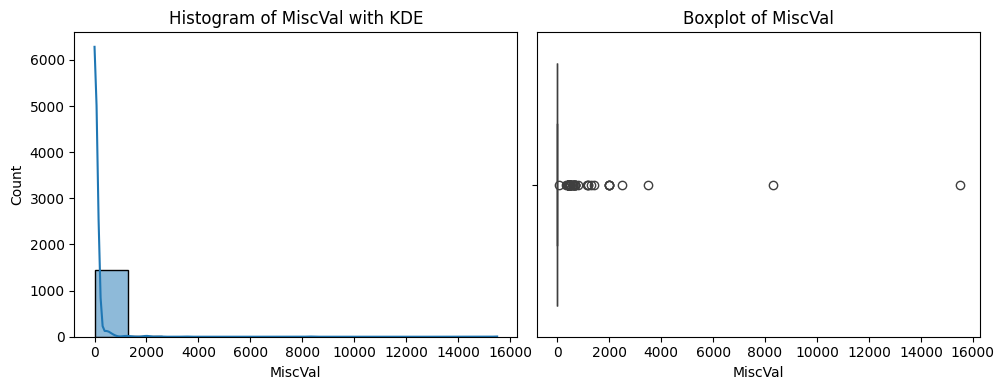

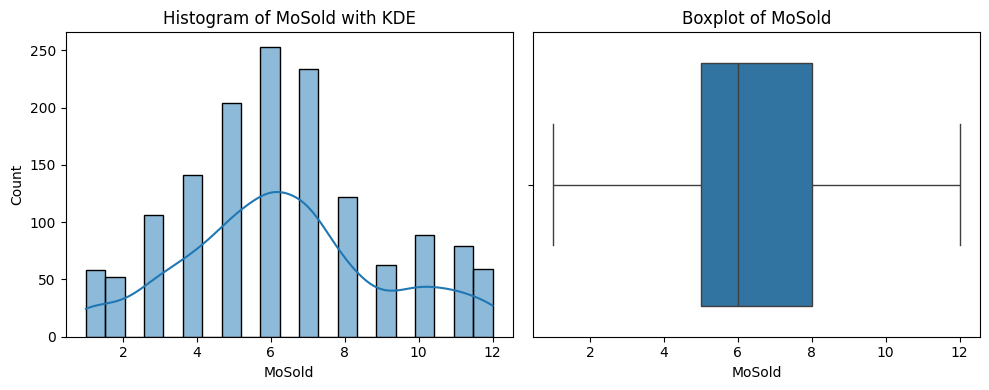

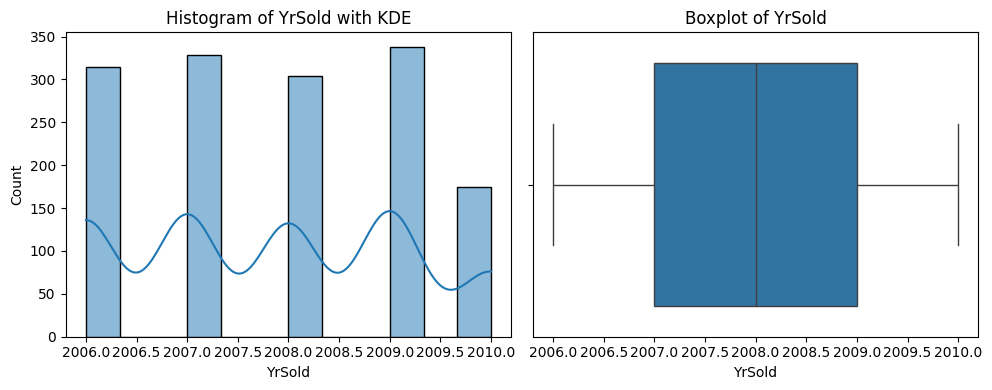

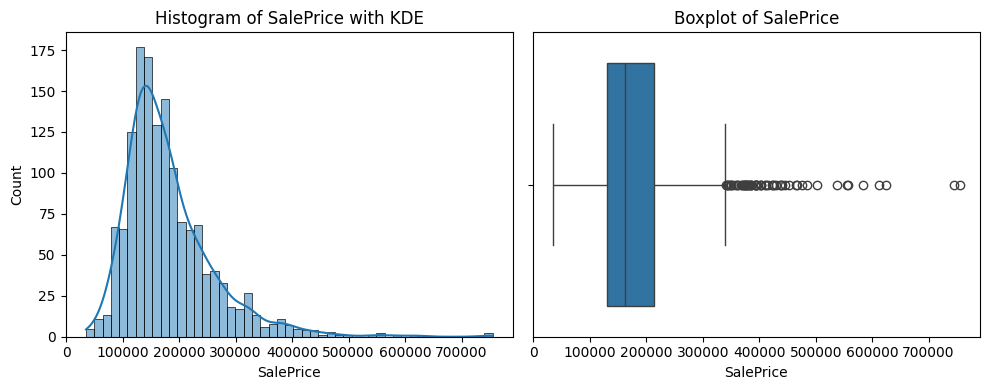

In [27]:
for feature in num_features:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0 = axes[0]
    ax0.set_title("Histogram of {} with KDE".format(feature))
    sns.histplot(data=df_train, x=feature, kde=True, ax=ax0)
    
    ax1 = axes[1]
    ax1.set_title("Boxplot of {}".format(feature))
    sns.boxplot(data=df_train, x=feature, ax=ax1)

    plt.tight_layout()
    plt.show()

In [28]:
def plot_pie_chart(data):
    num_of_cat = data.nunique()
    if num_of_cat > 4: # if categories are more than 4, group the rare categories as 'others'
        category_counts = data.value_counts().sort_values(ascending=False)
        top_three_categories = category_counts[:3]
        other_count = category_counts[3:].sum()

        categories = list(top_three_categories.index)
        counts = list(top_three_categories.values)
        categories.append("Others")
        counts.append(other_count)
    else:
        categories = data.unique()
        counts = data.value_counts()
    explode = [0.1 for i in range(len(categories))]
        
    # Plot the pie chart
    plt.pie(counts, labels=categories, autopct='%1.1f%%',explode=explode)
    plt.axis('equal')  

    plt.show()

Feature: MSZoning
Number of unique categories: 5
Categories: ['RL' 'RM' 'C (all)' 'FV' 'RH']


MSZoning
RL         78.8
RM         14.9
FV          4.5
RH          1.1
C (all)     0.7
Name: count, dtype: float64


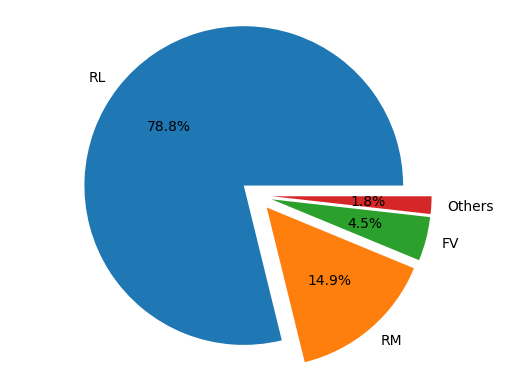

Feature: Street
Number of unique categories: 2
Categories: ['Pave' 'Grvl']


Street
Pave    99.6
Grvl     0.4
Name: count, dtype: float64


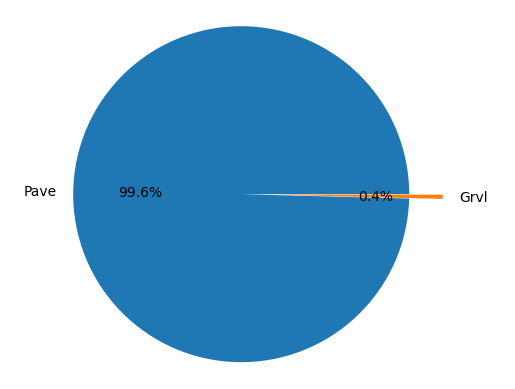

Feature: LotShape
Number of unique categories: 4
Categories: ['Reg' 'IR1' 'IR2' 'IR3']


LotShape
Reg    63.4
IR1    33.2
IR2     2.8
IR3     0.7
Name: count, dtype: float64


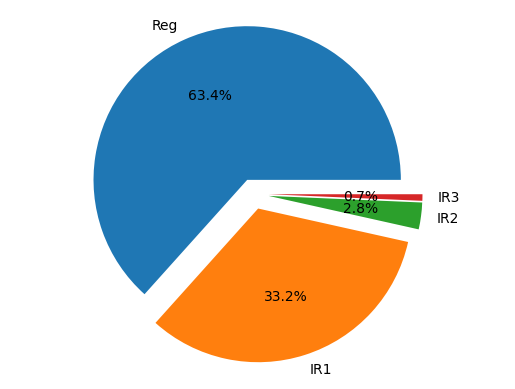

Feature: LandContour
Number of unique categories: 4
Categories: ['Lvl' 'Bnk' 'Low' 'HLS']


LandContour
Lvl    89.8
Bnk     4.3
HLS     3.4
Low     2.5
Name: count, dtype: float64


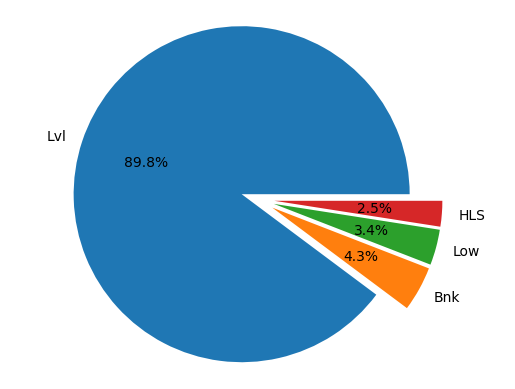

Feature: Utilities
Number of unique categories: 2
Categories: ['AllPub' 'NoSeWa']


Utilities
AllPub    99.9
NoSeWa     0.1
Name: count, dtype: float64


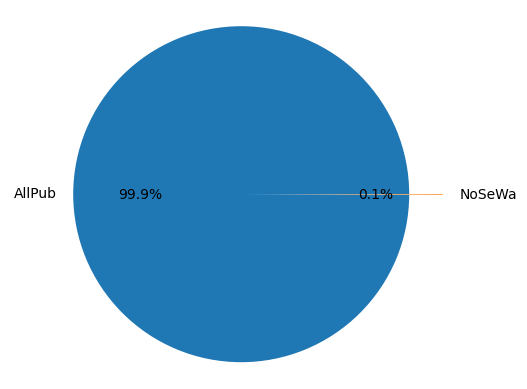

Feature: LotConfig
Number of unique categories: 5
Categories: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


LotConfig
Inside     72.1
Corner     18.0
CulDSac     6.4
FR2         3.2
FR3         0.3
Name: count, dtype: float64


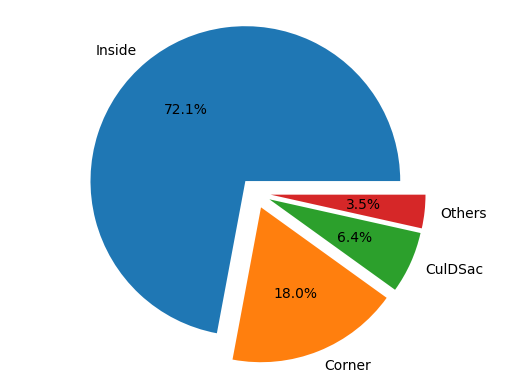

Feature: LandSlope
Number of unique categories: 3
Categories: ['Gtl' 'Mod' 'Sev']


LandSlope
Gtl    94.7
Mod     4.5
Sev     0.9
Name: count, dtype: float64


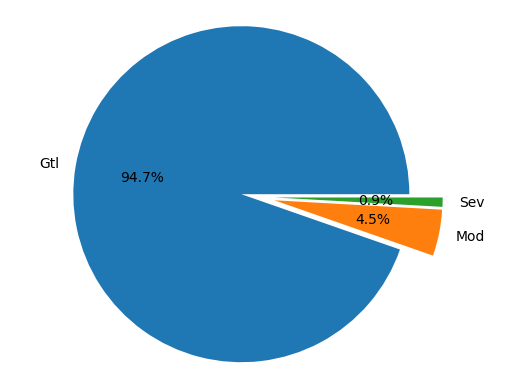

Feature: Neighborhood
Number of unique categories: 25
Categories: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Neighborhood
NAmes      15.4
CollgCr    10.3
OldTown     7.7
Edwards     6.8
Somerst     5.9
Gilbert     5.4
NridgHt     5.3
Sawyer      5.1
NWAmes      5.0
SawyerW     4.0
BrkSide     4.0
Crawfor     3.5
Mitchel     3.4
NoRidge     2.8
Timber      2.6
IDOTRR      2.5
ClearCr     1.9
StoneBr     1.7
SWISU       1.7
MeadowV     1.2
Blmngtn     1.2
BrDale      1.1
Veenker     0.8
NPkVill     0.6
Blueste     0.1
Name: count, dtype: float64


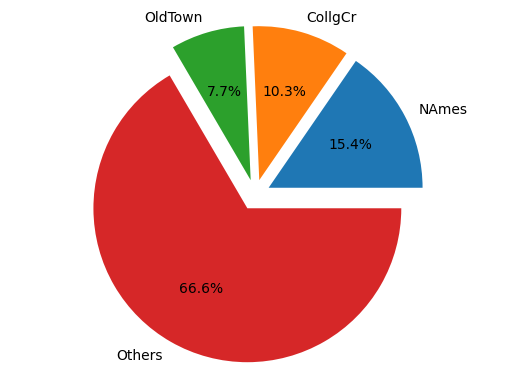

Feature: Condition1
Number of unique categories: 9
Categories: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Condition1
Norm      86.3
Feedr      5.5
Artery     3.3
RRAn       1.8
PosN       1.3
RRAe       0.8
PosA       0.5
RRNn       0.3
RRNe       0.1
Name: count, dtype: float64


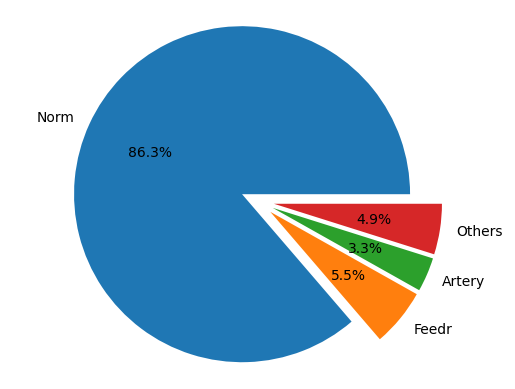

Feature: Condition2
Number of unique categories: 8
Categories: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


Condition2
Norm      99.0
Feedr      0.4
Artery     0.1
RRNn       0.1
PosN       0.1
PosA       0.1
RRAn       0.1
RRAe       0.1
Name: count, dtype: float64


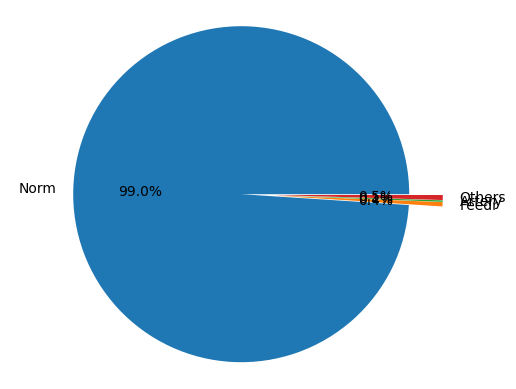

Feature: BldgType
Number of unique categories: 5
Categories: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


BldgType
1Fam      83.6
TwnhsE     7.8
Duplex     3.6
Twnhs      2.9
2fmCon     2.1
Name: count, dtype: float64


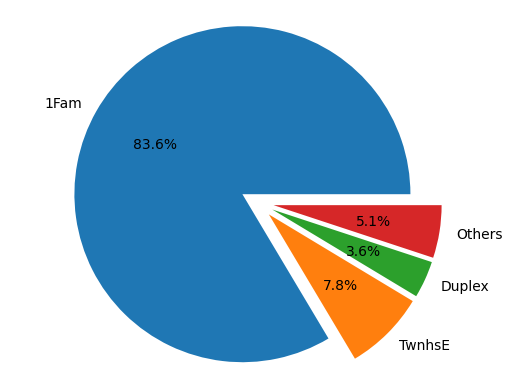

Feature: HouseStyle
Number of unique categories: 8
Categories: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


HouseStyle
1Story    49.7
2Story    30.5
1.5Fin    10.5
SLvl       4.5
SFoyer     2.5
1.5Unf     1.0
2.5Unf     0.8
2.5Fin     0.5
Name: count, dtype: float64


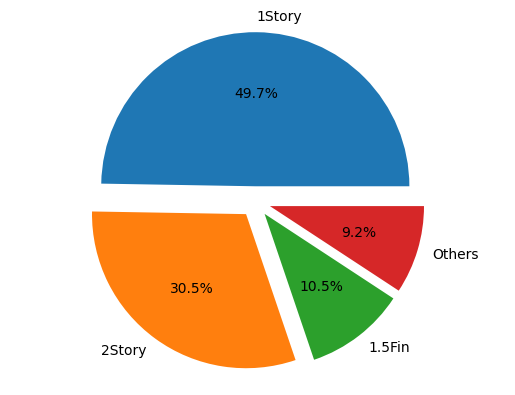

Feature: RoofStyle
Number of unique categories: 6
Categories: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']


RoofStyle
Gable      78.2
Hip        19.6
Flat        0.9
Gambrel     0.8
Mansard     0.5
Shed        0.1
Name: count, dtype: float64


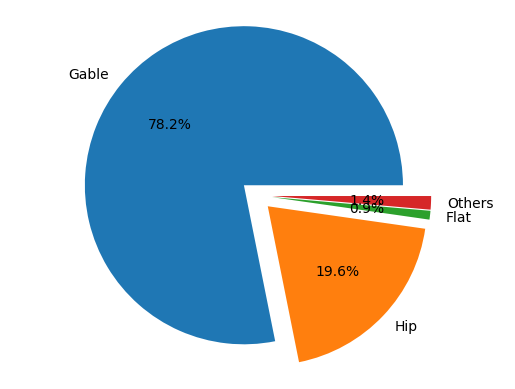

Feature: RoofMatl
Number of unique categories: 8
Categories: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']


RoofMatl
CompShg    98.2
Tar&Grv     0.8
WdShngl     0.4
WdShake     0.3
Metal       0.1
Membran     0.1
Roll        0.1
ClyTile     0.1
Name: count, dtype: float64


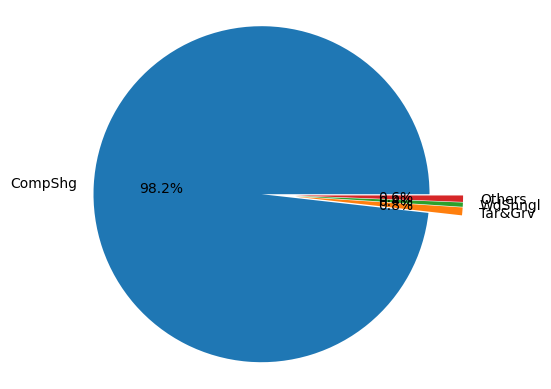

Feature: Exterior1st
Number of unique categories: 15
Categories: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


Exterior1st
VinylSd    35.3
HdBoard    15.2
MetalSd    15.1
Wd Sdng    14.1
Plywood     7.4
CemntBd     4.2
BrkFace     3.4
WdShing     1.8
Stucco      1.7
AsbShng     1.4
BrkComm     0.1
Stone       0.1
AsphShn     0.1
ImStucc     0.1
CBlock      0.1
Name: count, dtype: float64


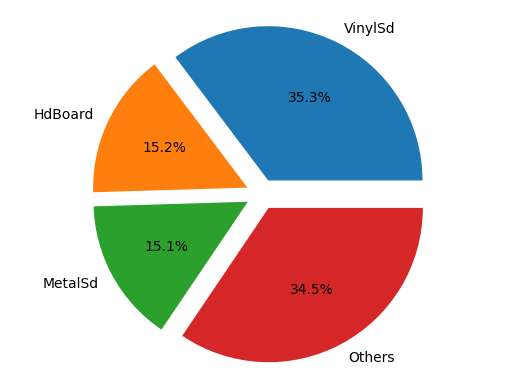

Feature: Exterior2nd
Number of unique categories: 16
Categories: ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']


Exterior2nd
VinylSd    34.5
MetalSd    14.7
HdBoard    14.2
Wd Sdng    13.5
Plywood     9.7
CmentBd     4.1
Wd Shng     2.6
Stucco      1.8
BrkFace     1.7
AsbShng     1.4
ImStucc     0.7
Brk Cmn     0.5
Stone       0.3
AsphShn     0.2
Other       0.1
CBlock      0.1
Name: count, dtype: float64


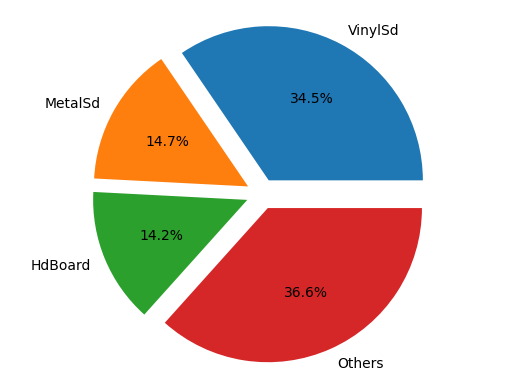

Feature: ExterQual
Number of unique categories: 4
Categories: ['Gd' 'TA' 'Ex' 'Fa']


ExterQual
TA    62.1
Gd    33.4
Ex     3.6
Fa     1.0
Name: count, dtype: float64


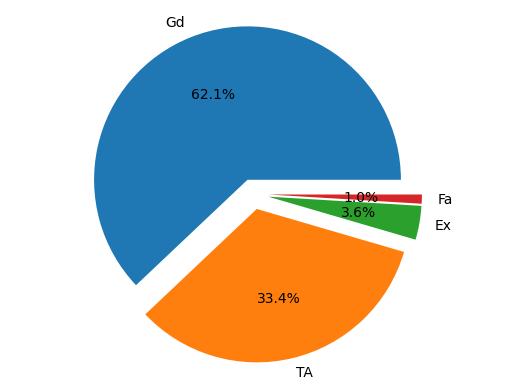

Feature: ExterCond
Number of unique categories: 5
Categories: ['TA' 'Gd' 'Fa' 'Po' 'Ex']


ExterCond
TA    87.8
Gd    10.0
Fa     1.9
Ex     0.2
Po     0.1
Name: count, dtype: float64


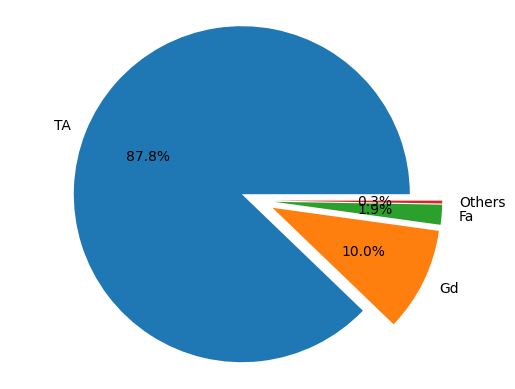

Feature: Foundation
Number of unique categories: 6
Categories: ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


Foundation
PConc     44.3
CBlock    43.4
BrkTil    10.0
Slab       1.6
Stone      0.4
Wood       0.2
Name: count, dtype: float64


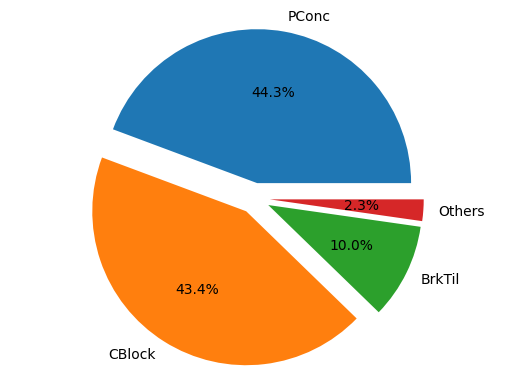

Feature: BsmtQual
Number of unique categories: 4
Categories: ['Gd' 'TA' 'Ex' 'Fa']


BsmtQual
TA    47.0
Gd    42.3
Ex     8.3
Fa     2.4
Name: count, dtype: float64


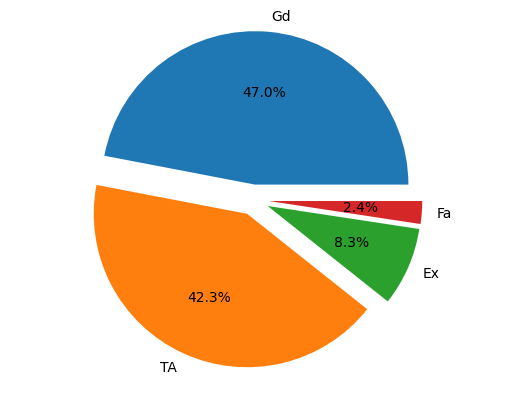

Feature: BsmtCond
Number of unique categories: 4
Categories: ['TA' 'Gd' 'Fa' 'Po']


BsmtCond
TA    92.3
Gd     4.5
Fa     3.1
Po     0.1
Name: count, dtype: float64


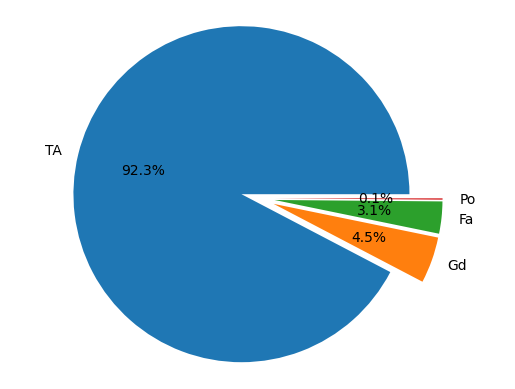

Feature: BsmtExposure
Number of unique categories: 4
Categories: ['No' 'Gd' 'Mn' 'Av']


BsmtExposure
No    67.9
Av    15.1
Gd     9.2
Mn     7.8
Name: count, dtype: float64


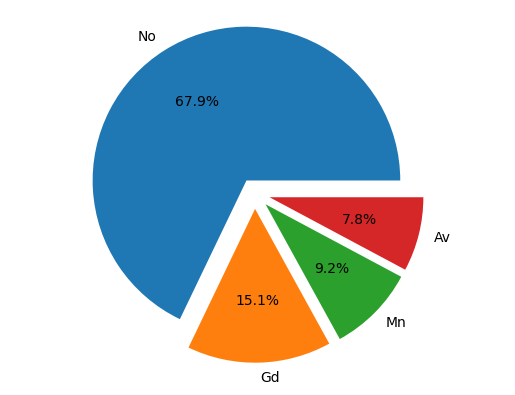

Feature: BsmtFinType1
Number of unique categories: 6
Categories: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']


BsmtFinType1
Unf    32.0
GLQ    28.6
ALQ    15.1
BLQ    10.1
Rec     9.1
LwQ     5.1
Name: count, dtype: float64


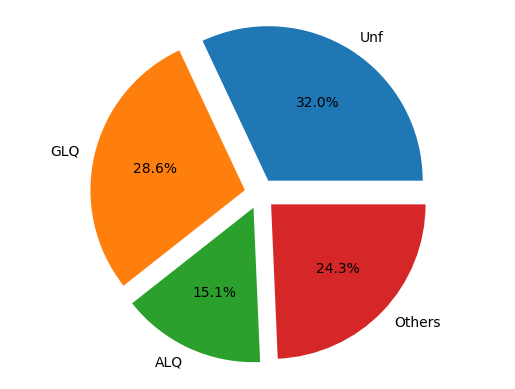

Feature: BsmtFinType2
Number of unique categories: 6
Categories: ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']


BsmtFinType2
Unf    88.6
Rec     3.7
LwQ     3.2
BLQ     2.3
ALQ     1.3
GLQ     1.0
Name: count, dtype: float64


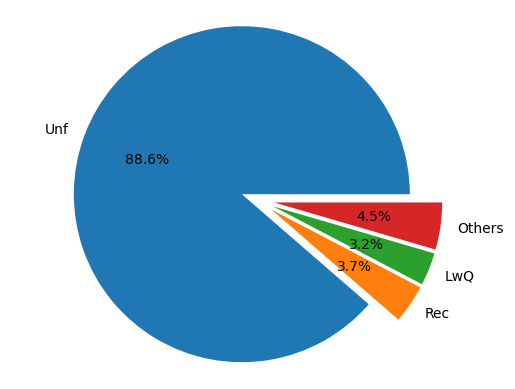

Feature: Heating
Number of unique categories: 6
Categories: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


Heating
GasA     97.8
GasW      1.2
Grav      0.5
Wall      0.3
OthW      0.1
Floor     0.1
Name: count, dtype: float64


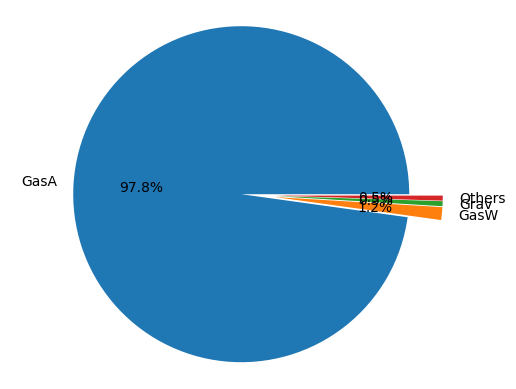

Feature: HeatingQC
Number of unique categories: 5
Categories: ['Ex' 'Gd' 'TA' 'Fa' 'Po']


HeatingQC
Ex    50.8
TA    29.3
Gd    16.5
Fa     3.4
Po     0.1
Name: count, dtype: float64


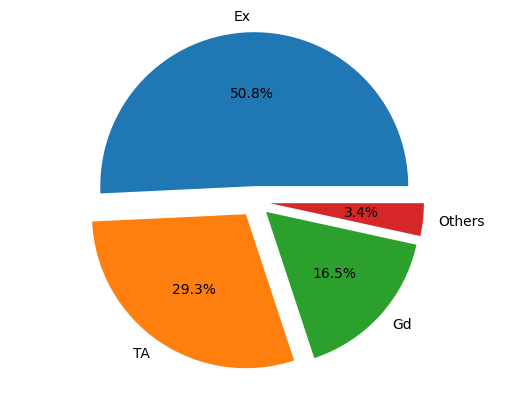

Feature: CentralAir
Number of unique categories: 2
Categories: ['Y' 'N']


CentralAir
Y    93.5
N     6.5
Name: count, dtype: float64


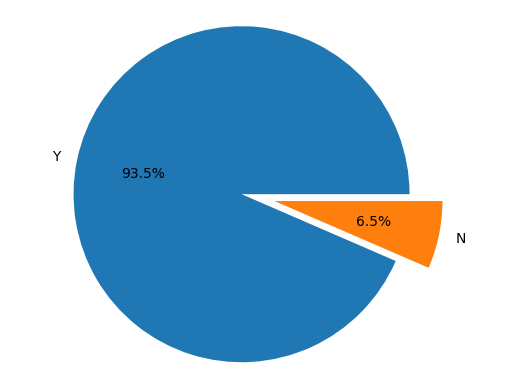

Feature: Electrical
Number of unique categories: 5
Categories: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


Electrical
SBrkr    91.4
FuseA     6.4
FuseF     1.8
FuseP     0.2
Mix       0.1
Name: count, dtype: float64


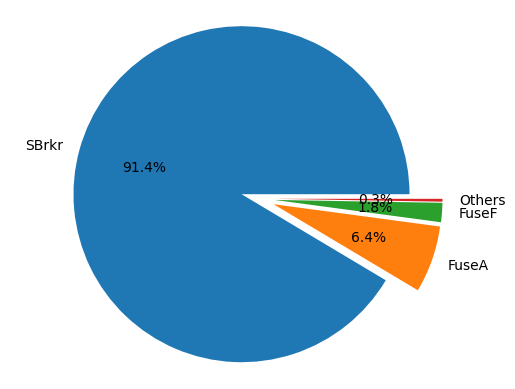

Feature: KitchenQual
Number of unique categories: 4
Categories: ['Gd' 'TA' 'Ex' 'Fa']


KitchenQual
TA    50.3
Gd    40.1
Ex     6.8
Fa     2.7
Name: count, dtype: float64


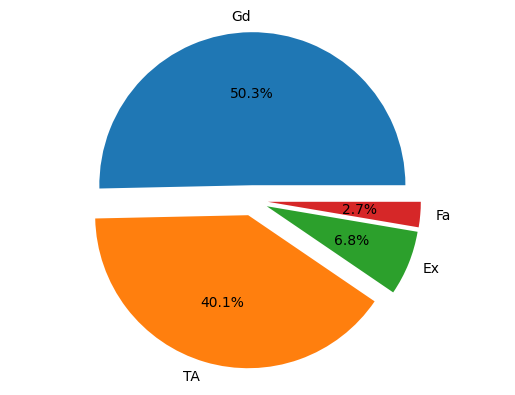

Feature: Functional
Number of unique categories: 7
Categories: ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


Functional
Typ     93.2
Min2     2.3
Min1     2.1
Mod      1.0
Maj1     1.0
Maj2     0.3
Sev      0.1
Name: count, dtype: float64


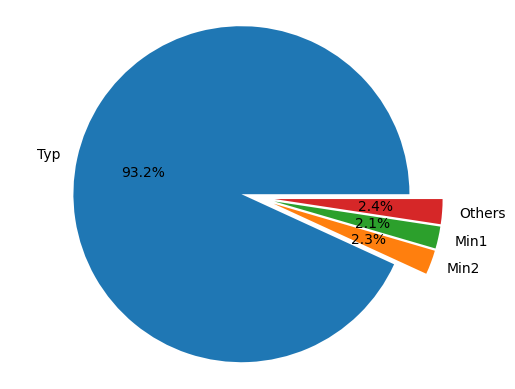

Feature: FireplaceQu
Number of unique categories: 5
Categories: ['Gd' 'TA' 'Fa' 'Ex' 'Po']


FireplaceQu
Gd    73.3
TA    21.4
Fa     2.3
Ex     1.6
Po     1.4
Name: count, dtype: float64


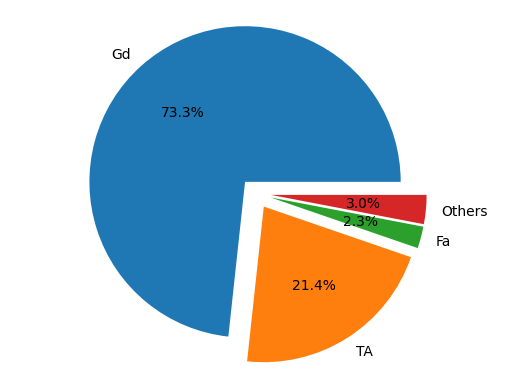

Feature: GarageType
Number of unique categories: 6
Categories: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Basment' '2Types']


GarageType
Attchd     65.1
Detchd     26.5
BuiltIn     6.0
Basment     1.3
CarPort     0.6
2Types      0.4
Name: count, dtype: float64


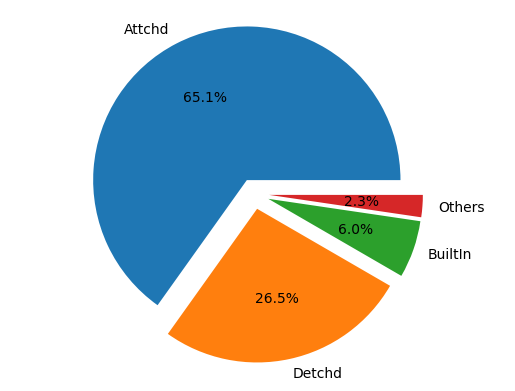

Feature: GarageFinish
Number of unique categories: 3
Categories: ['RFn' 'Unf' 'Fin']


GarageFinish
Unf    47.0
RFn    28.9
Fin    24.1
Name: count, dtype: float64


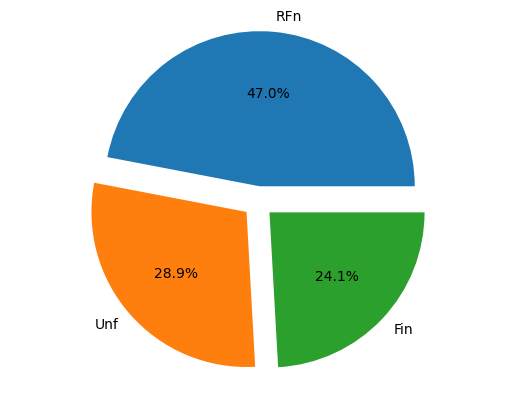

Feature: GarageQual
Number of unique categories: 5
Categories: ['TA' 'Fa' 'Gd' 'Ex' 'Po']


GarageQual
TA    95.3
Fa     3.3
Gd     1.0
Ex     0.2
Po     0.2
Name: count, dtype: float64


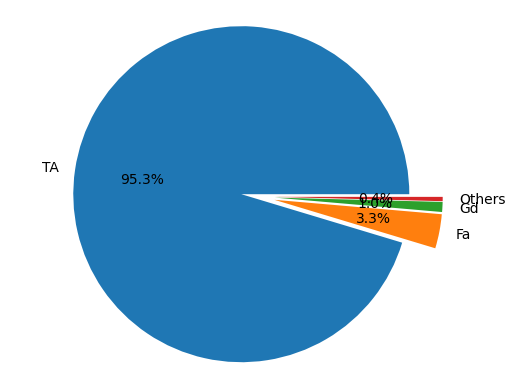

Feature: GarageCond
Number of unique categories: 5
Categories: ['TA' 'Fa' 'Gd' 'Po' 'Ex']


GarageCond
TA    96.4
Fa     2.4
Gd     0.6
Po     0.5
Ex     0.1
Name: count, dtype: float64


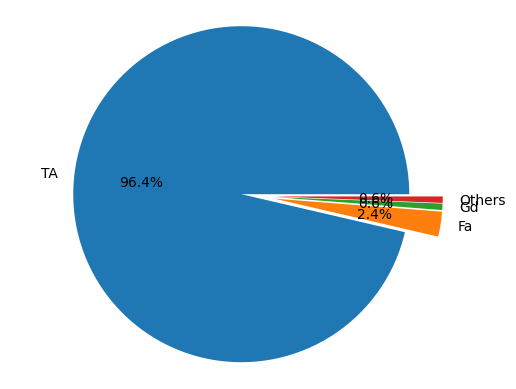

Feature: PavedDrive
Number of unique categories: 3
Categories: ['Y' 'N' 'P']


PavedDrive
Y    91.8
N     6.2
P     2.1
Name: count, dtype: float64


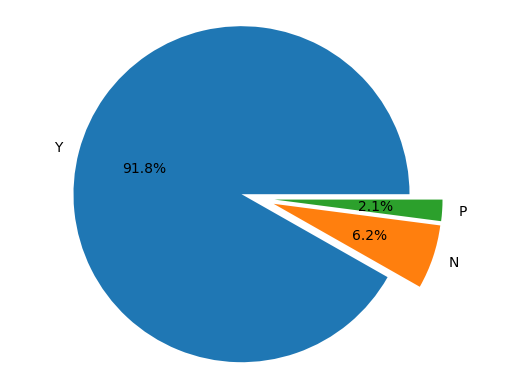

Feature: SaleType
Number of unique categories: 9
Categories: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


SaleType
WD       86.8
New       8.4
COD       2.9
ConLD     0.6
ConLI     0.3
ConLw     0.3
CWD       0.3
Oth       0.2
Con       0.1
Name: count, dtype: float64


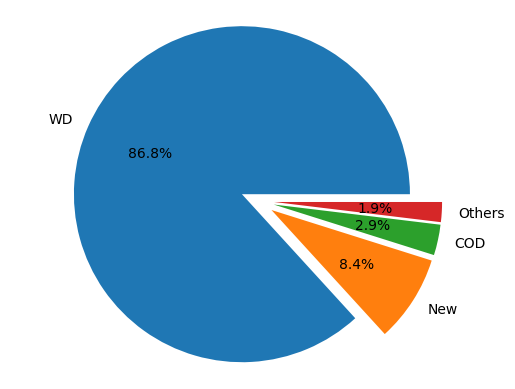

Feature: SaleCondition
Number of unique categories: 6
Categories: ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


SaleCondition
Normal     82.1
Partial     8.6
Abnorml     6.9
Family      1.4
Alloca      0.8
AdjLand     0.3
Name: count, dtype: float64


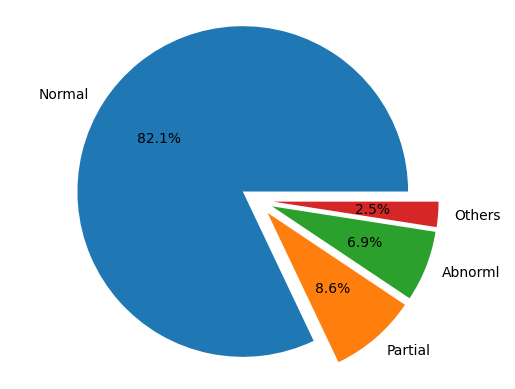

In [29]:
for feature in cat_features:
    data= df_train[feature]
    print("Feature: {}".format(data.name))
    print("Number of unique categories: {}".format(data.nunique()))
    print("Categories: {}".format(data.unique())) 
    print('\n')
    percentages = data.fillna('Nan').value_counts() / len(data) * 100
    print(percentages.round(1))
    plot_pie_chart(df_train[feature].fillna('NaN'))
    print("=============================================")

The target feature seems to be positively skewed